In [1]:
import pandas as pd
import numpy as np
import math
import distance
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [34]:
colnames = ['indice','pre','word','post']
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/lemmes_servitude/Seruus/Word_tags/1200-1249.csv', header = 4, names=colnames)
df = df[['pre','word','post']]
df['new'] = df['pre'] + (' ') + df['word']+ (' ') + df['post']
df['new'] = df['new'].str.lower()
df['drop'] = df['new'].str.find('seruus/sub  seruorum/sub  dei/sub ')
df = df[df['drop'] == -1]
df = df.reset_index()
df.pop('index')
df.pop('drop')
df.pop('new')
liste_1 = df['pre'].str.split(('  ')).tolist()
for i in range(len(liste_1)):
    liste_1[i] = liste_1[i][-5:]
    
liste_2 = df['post'].str.split(('  ')).tolist()
for i in range(len(liste_2)):
    liste_2[i] = liste_2[i][:5]
liste = []
for i in range(len(liste_1)):
    liste.append(liste_1[i] + liste_2[i])

In [39]:
for i in liste:
    for j in i:
        if j[-3:] != 'SUB':
            i.remove(j)
liste

[['ecclesie/SUB', 'homini/SUB'],
 ['ecclesie/SUB', 'homini/SUB'],
 ['ecclesia/SUB'],
 ['creditum/SUB', 'sudario/SUB', 'ore/SUB'],
 ['creditum/SUB', 'sudario/SUB', 'ore/SUB'],
 ['ecclesiam/SUB', 'liber/SUB', 'liber/SUB', 'maleficia/SUB'],
 ['canonicas/SUB', 'ecclesiam/SUB'],
 ['pontifici/SUB', 'sanctitatis/SUB', 'miseratione/SUB', 'sacerdos/SUB'],
 ['creditum/SUB', 'sudario/SUB', 'ore/SUB'],
 ['ecclesie/SUB', 'homini/SUB', 'domino/SUB', 'locatore/SUB'],
 ['gratia/SUB </s><s> religionis/SUB',
  'attactu/SUB </s><s> successores/SUB',
  'reges/SUB',
  ' dei/SUB',
  'temporibus/SUB',
  'subsidia/SUB'],
 ['elemosinam/SUB', 'filium/SUB'],
 [],
 ['homines/SUB', 'archiepiscopi/SUB'],
 ['solidos/SUB', ' Dei/SUB', 'solidos/SUB'],
 ['episcopus/SUB', 'presbyterum/SUB'],
 ['manu/SUB', 'anchillarum/SUB', 'pars/SUB'],
 [' Dei/SUB'],
 ['domini/SUB', 'excidium/SUB', 'filius/SUB'],
 ['peccator/SUB', 'archiepiscopi/SUB'],
 ['sacerdotes/SUB', 'mandata/SUB'],
 ['precessor/SUB'],
 ['Deo/SUB'],
 ['gratiam/SUB

In [40]:
flat_list = [item for sublist in liste for item in sublist]

In [41]:
flat_list

['ecclesie/SUB',
 'homini/SUB',
 'ecclesie/SUB',
 'homini/SUB',
 'ecclesia/SUB',
 'creditum/SUB',
 'sudario/SUB',
 'ore/SUB',
 'creditum/SUB',
 'sudario/SUB',
 'ore/SUB',
 'ecclesiam/SUB',
 'liber/SUB',
 'liber/SUB',
 'maleficia/SUB',
 'canonicas/SUB',
 'ecclesiam/SUB',
 'pontifici/SUB',
 'sanctitatis/SUB',
 'miseratione/SUB',
 'sacerdos/SUB',
 'creditum/SUB',
 'sudario/SUB',
 'ore/SUB',
 'ecclesie/SUB',
 'homini/SUB',
 'domino/SUB',
 'locatore/SUB',
 'gratia/SUB </s><s> religionis/SUB',
 'attactu/SUB </s><s> successores/SUB',
 'reges/SUB',
 ' dei/SUB',
 'temporibus/SUB',
 'subsidia/SUB',
 'elemosinam/SUB',
 'filium/SUB',
 'homines/SUB',
 'archiepiscopi/SUB',
 'solidos/SUB',
 ' Dei/SUB',
 'solidos/SUB',
 'episcopus/SUB',
 'presbyterum/SUB',
 'manu/SUB',
 'anchillarum/SUB',
 'pars/SUB',
 ' Dei/SUB',
 'domini/SUB',
 'excidium/SUB',
 'filius/SUB',
 'peccator/SUB',
 'archiepiscopi/SUB',
 'sacerdotes/SUB',
 'mandata/SUB',
 'precessor/SUB',
 'Deo/SUB',
 'gratiam/SUB',
 'episcopus/SUB',
 'pre

In [42]:
for i in range(len(flat_list)):
    flat_list[i] = flat_list[i].split('/')[0].lower()
    flat_list[i] = flat_list[i].replace(' ','')
    if flat_list[i].endswith(('arum','orum','ibus')):
        flat_list[i] = flat_list[i][:-4]
    else:
        flat_list[i] = flat_list[i][:-2]
flat_list

['eccles',
 'homi',
 'eccles',
 'homi',
 'eccles',
 'credit',
 'sudar',
 'o',
 'credit',
 'sudar',
 'o',
 'ecclesi',
 'lib',
 'lib',
 'malefic',
 'canonic',
 'ecclesi',
 'pontifi',
 'sanctitat',
 'miseratio',
 'sacerd',
 'credit',
 'sudar',
 'o',
 'eccles',
 'homi',
 'domi',
 'locato',
 'grat',
 'attac',
 'reg',
 'd',
 'tempor',
 'subsid',
 'elemosin',
 'fili',
 'homin',
 'archiepisco',
 'solid',
 'd',
 'solid',
 'episcop',
 'presbyter',
 'ma',
 'anchill',
 'pa',
 'd',
 'domi',
 'excidi',
 'fili',
 'peccat',
 'archiepisco',
 'sacerdot',
 'manda',
 'precess',
 'd',
 'grati',
 'episcop',
 'presbyter',
 'uolunta',
 'd',
 'recess',
 'occas',
 'domi',
 'seru',
 'd',
 'ser',
 'seru',
 'd',
 'ser',
 'seru',
 'seru',
 'd',
 'homin',
 'form',
 'similitudi',
 'homin',
 'ingratitudin',
 'uit',
 'iug',
 'domin',
 'mor',
 'negligent',
 'loc',
 'domi',
 'pass',
 'domin',
 'passion',
 'homin',
 'sanctitat',
 'sanctitat',
 'sanctitat',
 'oration',
 'patriarch',
 'tempo',
 'ui',
 'internecion',
 'auric

In [43]:
my_dict = dict(Counter(flat_list).most_common()[:10])
my_dict

{'d': 59,
 'episcop': 37,
 'seru': 35,
 'domi': 31,
 'eccles': 26,
 'fili': 21,
 'an': 21,
 'frat': 18,
 'homin': 17,
 'ancill': 13}

In [46]:
my_dict = {"deus" if k == "d" else k:v for k,v in my_dict.items()} 
my_dict = {"ecclesia" if k == "eccles" else k:v for k,v in my_dict.items()}
my_dict = {"ancilla" if k == "ancill" else k:v for k,v in my_dict.items()}
my_dict = {"episcopus" if k == "episcop" else k:v for k,v in my_dict.items()}
my_dict = {"frater" if k == "frat" else k:v for k,v in my_dict.items()}
my_dict = {"seruus" if k == "seru" else k:v for k,v in my_dict.items()}
my_dict = {"homo" if k == "homin" else k:v for k,v in my_dict.items()}
my_dict = {"annus" if k == "an" else k:v for k,v in my_dict.items()}
my_dict = {"filius" if k == "fili" else k:v for k,v in my_dict.items()}
my_dict = {"dominus" if k == "domi" else k:v for k,v in my_dict.items()}

In [47]:
my_dict

{'deus': 59,
 'episcopus': 37,
 'seruus': 35,
 'dominus': 31,
 'ecclesia': 26,
 'filius': 21,
 'annus': 21,
 'frater': 18,
 'homo': 17,
 'ancilla': 13}

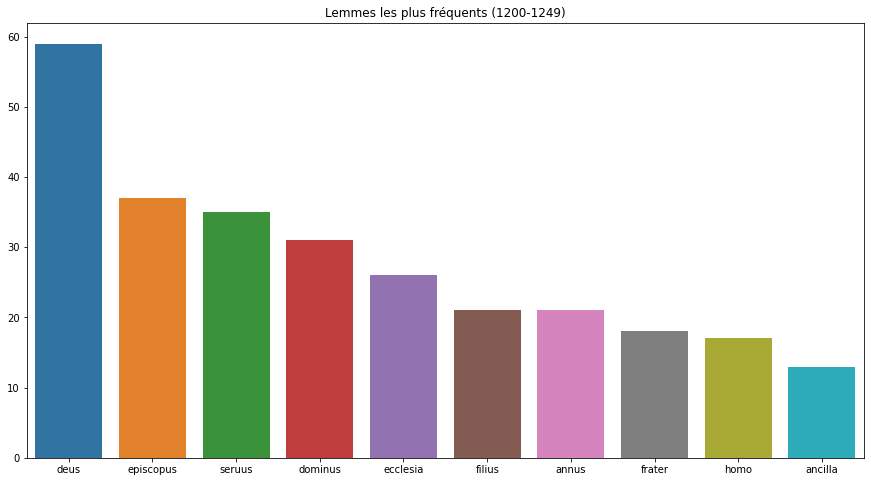

In [48]:
keys = list(my_dict.keys())
vals = [float(my_dict[k]) for k in keys]
plt.figure(figsize=(15,8))
sns.barplot(x=keys, y=vals)
plt.title('Lemmes les plus fréquents (1200-1249)')
plt.savefig("collemmes_1200.png",dpi=300)